<a href="https://colab.research.google.com/github/Izect/CSST-101-3A/blob/main/3A-TEA%C3%91O-HEALTH-MP4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [45]:
!pip install pgmpy

2. Importing Libraries

In [46]:

import pandas as pd
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from pgmpy.models import BayesianNetwork
from pgmpy.factors.discrete import TabularCPD
from pgmpy.inference import VariableElimination

Exercise 2: Define the Bayesian Network Structure

Define the Variables

In [47]:
model = BayesianNetwork([
    ('Age', 'HeartDisease'),
    ('Smoking', 'HeartDisease'),
    ('Exercise', 'HeartDisease'),
    ('Cholesterol', 'HeartDisease'),
    ('BloodPressure', 'HeartDisease'),
    ('HeartDisease', 'ChestPain'),
    ('HeartDisease', 'ECGResult')
])

print(model.edges())

[('Age', 'HeartDisease'), ('HeartDisease', 'ChestPain'), ('HeartDisease', 'ECGResult'), ('Smoking', 'HeartDisease'), ('Exercise', 'HeartDisease'), ('Cholesterol', 'HeartDisease'), ('BloodPressure', 'HeartDisease')]


Define the Relationships

Model the dependencies as follows:

Heart Disease depends on Age, Smoking, Exercise, Cholesterol, and Blood Pressure.

Chest Pain depends on Heart Disease.

ECG Result depends on Heart Disease

Exercise 3: Define Conditional Probability Tables (CPTs)

Create CPTs Using pgmpy

In [48]:
# Age
cpd_age = TabularCPD(variable='Age', variable_card=3, values=[[0.3], [0.4], [0.3]])

# Smoking (y/n)
cpd_smoking = TabularCPD(variable='Smoking', variable_card=2, values=[[0.7], [0.3]])

# Exercise
cpd_exercise = TabularCPD(variable='Exercise', variable_card=2, values=[[0.6], [0.4]])

# Cholesterol level
cpd_cholesterol = TabularCPD(variable='Cholesterol', variable_card=2, values=[[0.5], [0.5]])

# Blood Pressure level
cpd_blood_pressure = TabularCPD(variable='BloodPressure', variable_card=2, values=[[0.4], [0.6]])

cpd_heart_disease = TabularCPD(variable='HeartDisease', variable_card=2,
                               values=[

                                   [0.9, 0.8, 0.7, 0.6, 0.8, 0.7, 0.6, 0.5, 0.7, 0.6, 0.5, 0.4, 0.6, 0.5, 0.4, 0.3,
                                    0.8, 0.7, 0.6, 0.5, 0.7, 0.6, 0.5, 0.4, 0.6, 0.5, 0.4, 0.3, 0.5, 0.4, 0.3, 0.2,
                                    0.7, 0.6, 0.5, 0.4, 0.6, 0.5, 0.4, 0.3, 0.5, 0.4, 0.3, 0.2, 0.4, 0.3, 0.2, 0.1],

                                   [0.1, 0.2, 0.3, 0.4, 0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.5, 0.6, 0.4, 0.5, 0.6, 0.7,
                                    0.2, 0.3, 0.4, 0.5, 0.3, 0.4, 0.5, 0.6, 0.4, 0.5, 0.6, 0.7, 0.5, 0.6, 0.7, 0.8,
                                    0.3, 0.4, 0.5, 0.6, 0.4, 0.5, 0.6, 0.7, 0.5, 0.6, 0.7, 0.8, 0.6, 0.7, 0.8, 0.9]
                               ],
                               evidence=['Age', 'Smoking', 'Exercise', 'Cholesterol', 'BloodPressure'],
                               evidence_card=[3, 2, 2, 2, 2])

cpd_chest_pain = TabularCPD(variable='ChestPain', variable_card=2,
                            values=[

                                [0.9, 0.3],
                                [0.1, 0.7]
                            ],
                            evidence=['HeartDisease'], evidence_card=[2])

cpd_ecg_result = TabularCPD(variable='ECGResult', variable_card=2,
                            values=[

                                [0.85, 0.3],
                                [0.15, 0.7]
                            ],
                            evidence=['HeartDisease'], evidence_card=[2])

model.add_cpds(cpd_age, cpd_smoking, cpd_exercise, cpd_cholesterol, cpd_blood_pressure,
               cpd_heart_disease, cpd_chest_pain, cpd_ecg_result)

assert model.check_model(), "The model structure or CPDs are incorrect!"

Exercise 4: Inference in the Bayesian Network

In [49]:
inference = VariableElimination(model)

# Query: Probability of having Heart Disease given specific conditions
query_heart_disease = inference.query(variables=['HeartDisease'],
                                       evidence={'Age': 1, 'Smoking': 1,
                                                 'Cholesterol': 1,
                                                 'BloodPressure': 1}) # Changed 'Blood Pressure' to 'BloodPressure'
print(query_heart_disease)

# Query: Probability of an Abnormal ECG Result given Chest Pain
query_ecg_result = inference.query(variables=['ECGResult'],
                                    evidence={'ChestPain': 1})
print(query_ecg_result)

+-----------------+---------------------+
| HeartDisease    |   phi(HeartDisease) |
+=================+=====================+
| HeartDisease(0) |              0.2600 |
+-----------------+---------------------+
| HeartDisease(1) |              0.7400 |
+-----------------+---------------------+
+--------------+------------------+
| ECGResult    |   phi(ECGResult) |
+==============+==================+
| ECGResult(0) |           0.3790 |
+--------------+------------------+
| ECGResult(1) |           0.6210 |
+--------------+------------------+


In [50]:
query_no_exercise = inference.query(variables=['HeartDisease'], evidence={'Exercise': 1})
print(query_no_exercise)

+-----------------+---------------------+
| HeartDisease    |   phi(HeartDisease) |
+=================+=====================+
| HeartDisease(0) |              0.4800 |
+-----------------+---------------------+
| HeartDisease(1) |              0.5200 |
+-----------------+---------------------+


Exercise 5: Parameter Learning from Simulated Data

Simulate a Healthcare Dataset

In [51]:
data = pd.DataFrame({
    'Age': np.random.choice(['Young', 'Middle-aged', 'Old'], 1000),
    'Smoking': np.random.choice(['Yes', 'No'], 1000),
    'Exercise': np.random.choice(['Regular', 'None'], 1000),
    'Cholesterol': np.random.choice(['High', 'Normal'], 1000),
    'Blood Pressure': np.random.choice(['High', 'Normal'], 1000),
})

data['Heart Disease'] = np.where((data['Smoking'] == 'Yes') & (data['Cholesterol'] == 'High'),
                                  np.random.choice(['Yes', 'No'], p=[0.7, 0.3]),
                                  np.random.choice(['Yes', 'No'], p=[0.3, 0.7]))

Estimate Parameters

In [52]:
import pandas as pd

data = {
    'Heart_Disease': [1, 0, 1, 1, 0, 0, 1, 0, 1, 0],
    'Chest_Pain': [1, 0, 1, 1, 0, 0, 1, 0, 1, 0],
    'ECG_Result': [1, 0, 1, 0, 0, 1, 1, 0, 1, 0]
}
df = pd.DataFrame(data)

def calculate_cpt(df, target_node, condition_nodes):
    cpt = {}

    grouped = df.groupby(condition_nodes)[target_node].value_counts(normalize=True).unstack(fill_value=0)

    for index in grouped.index:
        cpt[index] = grouped.loc[index].to_dict()

    return cpt

cpt_heart_disease = calculate_cpt(df, 'Heart_Disease', ['Chest_Pain', 'ECG_Result'])
cpt_chest_pain = calculate_cpt(df, 'Chest_Pain', ['Heart_Disease', 'ECG_Result'])
cpt_ecg_result = calculate_cpt(df, 'ECG_Result', ['Heart_Disease', 'Chest_Pain'])

print("Learned CPT for Heart Disease:")
print(cpt_heart_disease)

print("\nLearned CPT for Chest Pain:")
print(cpt_chest_pain)

print("\nLearned CPT for ECG Result:")
print(cpt_ecg_result)

initial_cpt_heart_disease = { (0,0): 0.2, (0,1): 0.3, (1,0): 0.5 }
initial_cpt_chest_pain = { (0,0): 0.4, (1,1): 0.6 }
initial_cpt_ecg_result = { (1,0): 0.7 }

def compare_cpts(learned_cpt, initial_cpt):
    comparison = {}
    for key in learned_cpt.keys():
        comparison[key] = {
            'Initial': initial_cpt.get(key),
            'Learned': learned_cpt[key]
        }
    return comparison

# comparison
comparison_heart_disease = compare_cpts(cpt_heart_disease, initial_cpt_heart_disease)
comparison_chest_pain = compare_cpts(cpt_chest_pain, initial_cpt_chest_pain)
comparison_ecg_result = compare_cpts(cpt_ecg_result, initial_cpt_ecg_result)

print("\nComparison of Heart Disease CPT:")
print(comparison_heart_disease)

print("\nComparison of Chest Pain CPT:")
print(comparison_chest_pain)

print("\nComparison of ECG Result CPT:")
print(comparison_ecg_result)

Learned CPT for Heart Disease:
{(0, 0): {0: 1.0, 1: 0.0}, (0, 1): {0: 1.0, 1: 0.0}, (1, 0): {0: 0.0, 1: 1.0}, (1, 1): {0: 0.0, 1: 1.0}}

Learned CPT for Chest Pain:
{(0, 0): {0: 1.0, 1: 0.0}, (0, 1): {0: 1.0, 1: 0.0}, (1, 0): {0: 0.0, 1: 1.0}, (1, 1): {0: 0.0, 1: 1.0}}

Learned CPT for ECG Result:
{(0, 0): {0: 0.8, 1: 0.2}, (1, 1): {0: 0.2, 1: 0.8}}

Comparison of Heart Disease CPT:
{(0, 0): {'Initial': 0.2, 'Learned': {0: 1.0, 1: 0.0}}, (0, 1): {'Initial': 0.3, 'Learned': {0: 1.0, 1: 0.0}}, (1, 0): {'Initial': 0.5, 'Learned': {0: 0.0, 1: 1.0}}, (1, 1): {'Initial': None, 'Learned': {0: 0.0, 1: 1.0}}}

Comparison of Chest Pain CPT:
{(0, 0): {'Initial': 0.4, 'Learned': {0: 1.0, 1: 0.0}}, (0, 1): {'Initial': None, 'Learned': {0: 1.0, 1: 0.0}}, (1, 0): {'Initial': None, 'Learned': {0: 0.0, 1: 1.0}}, (1, 1): {'Initial': 0.6, 'Learned': {0: 0.0, 1: 1.0}}}

Comparison of ECG Result CPT:
{(0, 0): {'Initial': None, 'Learned': {0: 0.8, 1: 0.2}}, (1, 1): {'Initial': None, 'Learned': {0: 0.2, 1: 0

Exercise 6: Network Visualization and Analysis

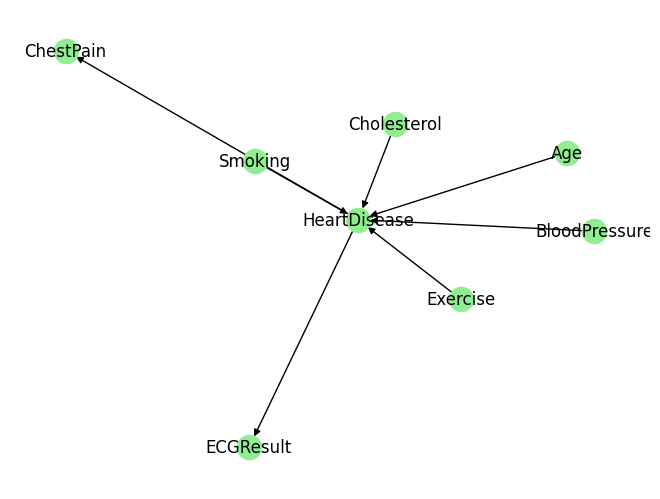

In [53]:

import networkx as nx
import matplotlib.pyplot as plt

nx_graph = nx.DiGraph(model.edges())

nx.draw(nx_graph, with_labels=True, node_color='lightgreen', edge_color='black')

plt.show()


Sensitivity Analysis:

Analyze how changes in smoking probability affect heart disease likelihood:

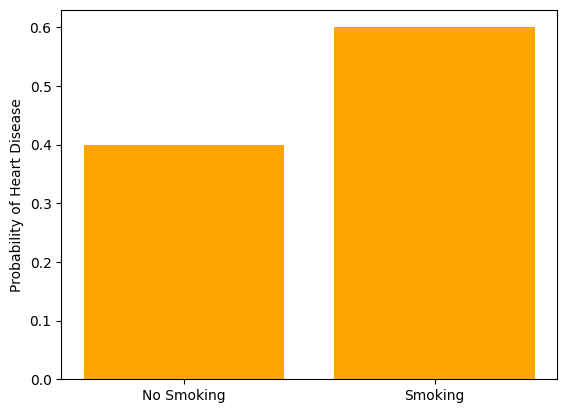

In [56]:
import matplotlib.pyplot as plt

smoking_values = [0, 1]
probabilities = []

for smoking in smoking_values:
    prob_heart_disease = infer.query(variables=['HeartDisease'], evidence={'Smoking': smoking})
    probabilities.append(prob_heart_disease)

plt.bar(['No Smoking', 'Smoking'], [prob.values[1] for prob in probabilities], color='orange')

plt.ylabel('Probability of Heart Disease')
plt.show()